## Plot overlap matrix of Sujechon

In [2]:
####### Cycle node numbers ##################
import json
f = open('sujechon_haegeumjeongakbo_cycleinfo_pitchinx.txt')
c = []
Lines = f.readlines()
for line in Lines:
    ci = json.loads(line)
    c.append(ci)

import numpy as np
L = list(np.loadtxt('sujechon_haegeumjeongakbo_allnode.txt',delimiter=','))    
nodelist = list(np.loadtxt('sujechon_haegeumjeongakbo_nodelist.txt',delimiter=','))
nodelist = sorted(nodelist)    

In [3]:
def nodeoverlap(c, L, nodelist):
    matrix = []; 
    for ci in c: # [0 6 19 20]
        row = []
        for node in L:
            inx = nodelist.index(node)
            if inx in ci:
#                 row.append(inx+1)
#                row.append(ci.index(inx)+1)
                row.append(1)
            else:
                row.append(0)
        matrix.append(row)
    for q in [3]:#range(1,8):#[3,4,5]:
        mat = [];
        for j,row in enumerate(matrix):
            new = []; leng = 0
            # construct new row
            for i,node in enumerate(row):
                if node == 0:
                    if leng == 0:
                        new.append(0)
                    else:
                        if leng > q:
                            new += row[i-leng:i]+[0]
                        else:
                            new += [0]*leng+[0]
                        leng = 0
                else:
                    leng += 1
            if leng != 0:
                if leng > q:
                    new += row[len(row)-leng:]
                else:
                    new += [0]*leng
            mat.append(new)
    
    return mat

mat1 = nodeoverlap(c, L, nodelist)  



In [4]:
import matplotlib.pyplot as plt

import seaborn as sns

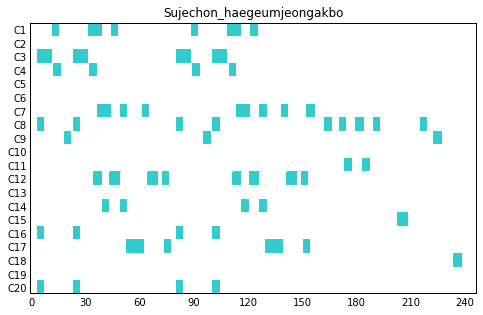

In [5]:
# plot overlap matrix
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

from matplotlib.colors import ListedColormap

# import matplotlib.ticker as ticker
# tick_spacing= 50
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax=sns.heatmap(mat1, cmap=ListedColormap(['white', (0.2,0.8,0.8)]),yticklabels = ['C'+str(i+1) for i in range(len(mat1))],cbar=False)



ax.axhline(y = 0, color='k',linewidth = 1)
ax.axhline(y = len(mat1)-0.1, color = 'k',
            linewidth = 1)
  
ax.axvline(x = 0, color = 'k',
            linewidth = 1)
  
ax.axvline(x = len(mat1[0])-0.6, 
            color = 'k', linewidth = 1)


# ax.xaxis.set_ticks_position('top')
# xtickss = np.arange(0,440,50)
# plt.xticks(xtickss)
n = 5  
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]




plt.setp(ax.get_xticklabels(), rotation=360)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Sujechon_haegeumjeongakbo')
plt.savefig('sjc_haegeumjeongakbo_om',bbox_inches='tight')
plt.show()